# Calculate the odds-ratios, the credible regions, and best fits

In this notebook, we will use the files computed in the previous notebook to extract high-level products, such as the odds-ratios, the credible regions for parameter estimations, and produce plots of various best-fitting parameters. 

First we will need the following packages:

In [1]:
import pyRaven as rav
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
data = rav.data.read_packet('ExampleOutput/01-DataSetup/ExamplePacket.h5')
param = rav.params.read_parameters('ExampleOutput/04-CalculateProbabilities/param_prob.json')

## Calculation of the odds ratios

In order to compute the odds ratios, we can use the wrapper function `BayesObjects.get_all_odds`. We need to provide the data and param objects, as well as the path to the folder that contains the products from the `calc_all_LHs` wrapper function. 

If you would like to compute the odds ratios for specific files, you can use the individual class functions described in INSERT TUTORIAL WHEN DONE. 

The `BayesObjects.get_all_odds` function returns two dictionaries, one with the values for the odds ratios with the non-flat priors for $B_p$ and $i$, while the second dictionary has the values for the odds ratios with flat priors.

In the code below, the first dictionary is converted to a pandas dataframe for a nice visual display. 
It is also easy to save the dataframe as a CSV file. 

GLH stands for the Global Likelihood, M0 is the non-magnetic model and M1 is the magnetic model. The odds ratios are given in log10. 

In [3]:
odds_withprior, odds_flatprior = rav.BayesObjects.get_all_odds(data, param, folder_path='ExampleOutput/04-CalculateProbabilities')

df = pd.DataFrame(odds_withprior)
df

,Obs,V ln(GLH_M0),N1 ln(GLH_M0),V ln(GLH_M1),N1 ln(GLH_M1),log10 Odds V,log10 Odds N1
0,Observation 0,264.779480,269.105140,264.137734,268.422151,0.278707,0.296618
1,Observation 1,256.884917,256.232317,256.581315,255.723270,0.131853,0.221076
2,Observation 2,260.084497,258.360746,261.040135,258.035069,-0.415028,0.141439
3,Combined,781.748894,783.698202,781.578210,783.055778,0.074127,0.279001


## Create diagnostic plots

The `BayesObjects.overview_plots` wrapper function creates a PDF with diagnostic plots from the products of the `calc_all_LHs` wrapper function. 

If you would like to make your own plots, class functions are available for various python objects for corner plots, 1D marginalizations, etc. Please consult the API. 

The PDF contains:
* The 1D marginalization for each observations taken individually. 
    - Pink is the normalized prior
    - 

()

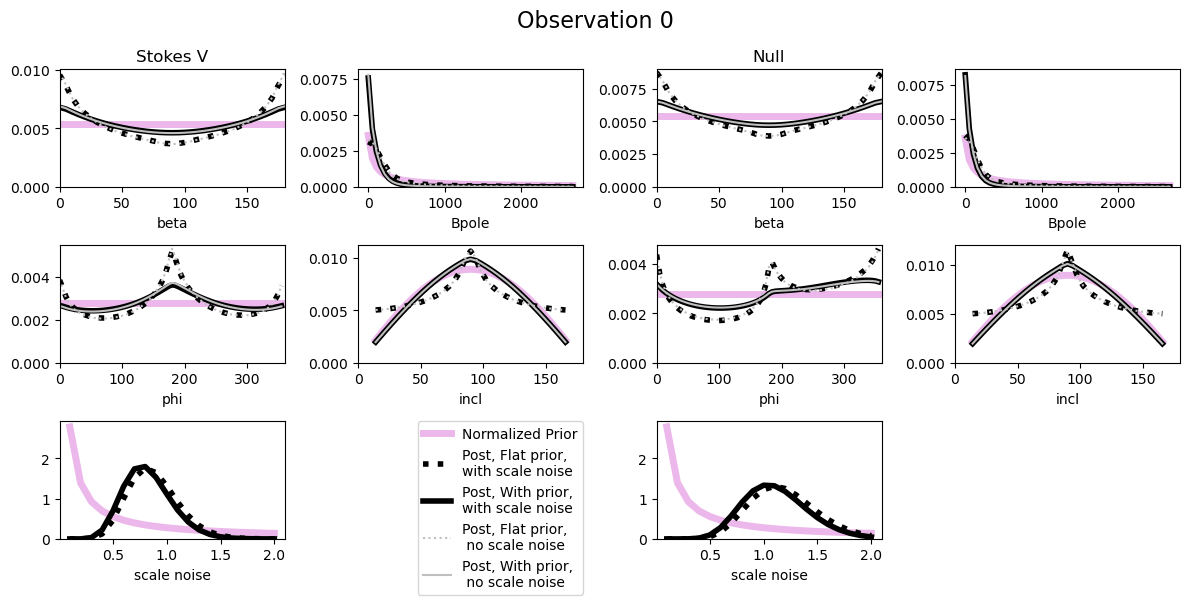

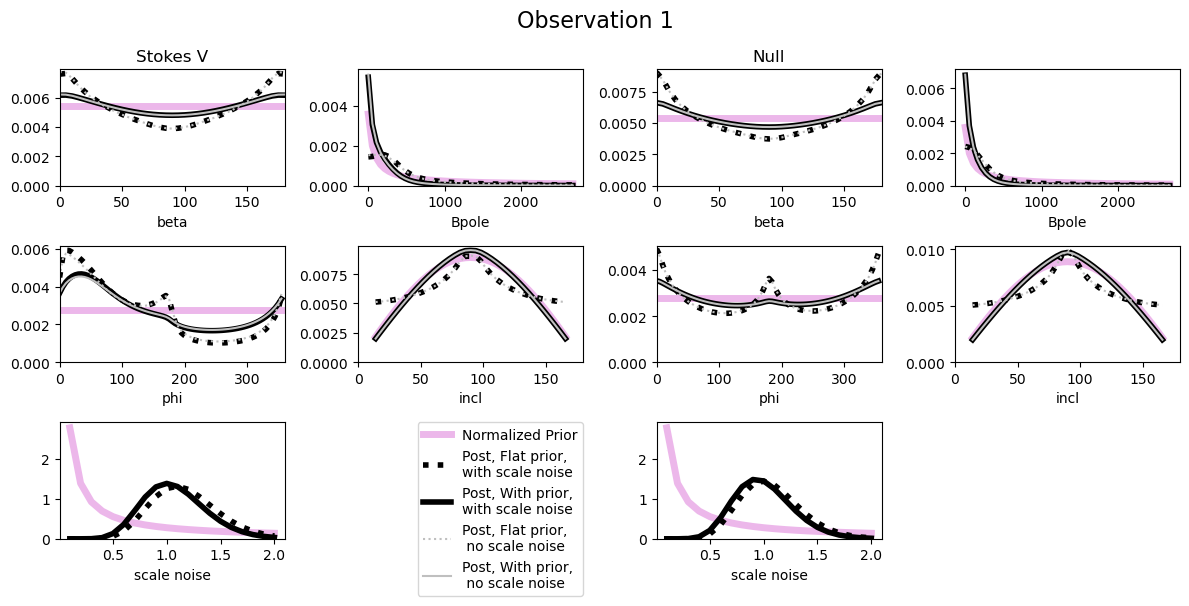

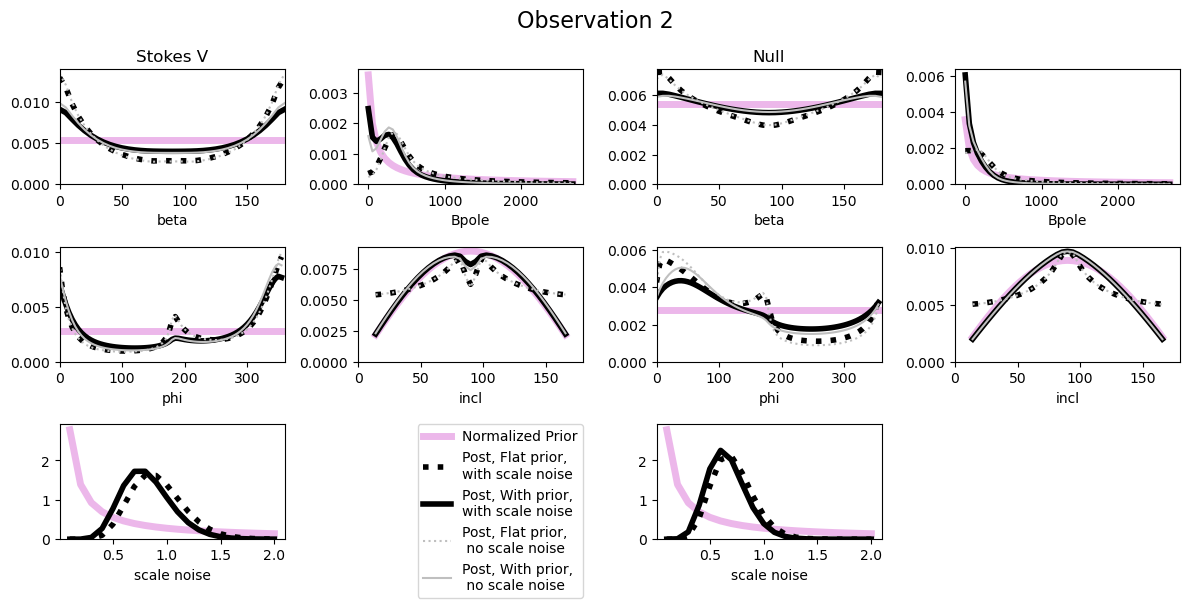

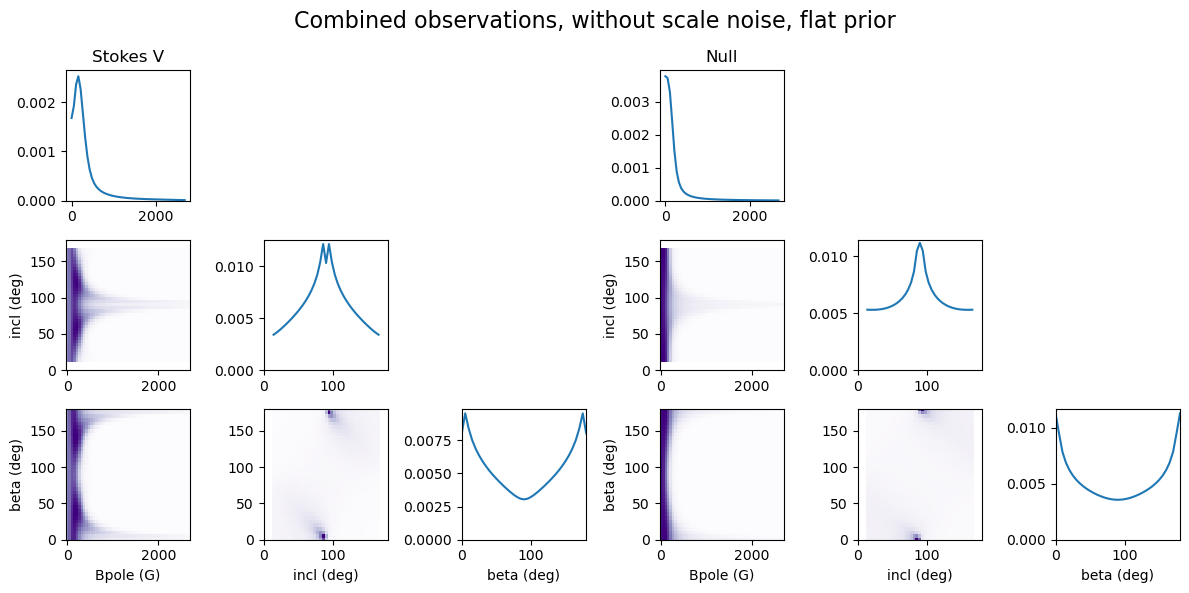

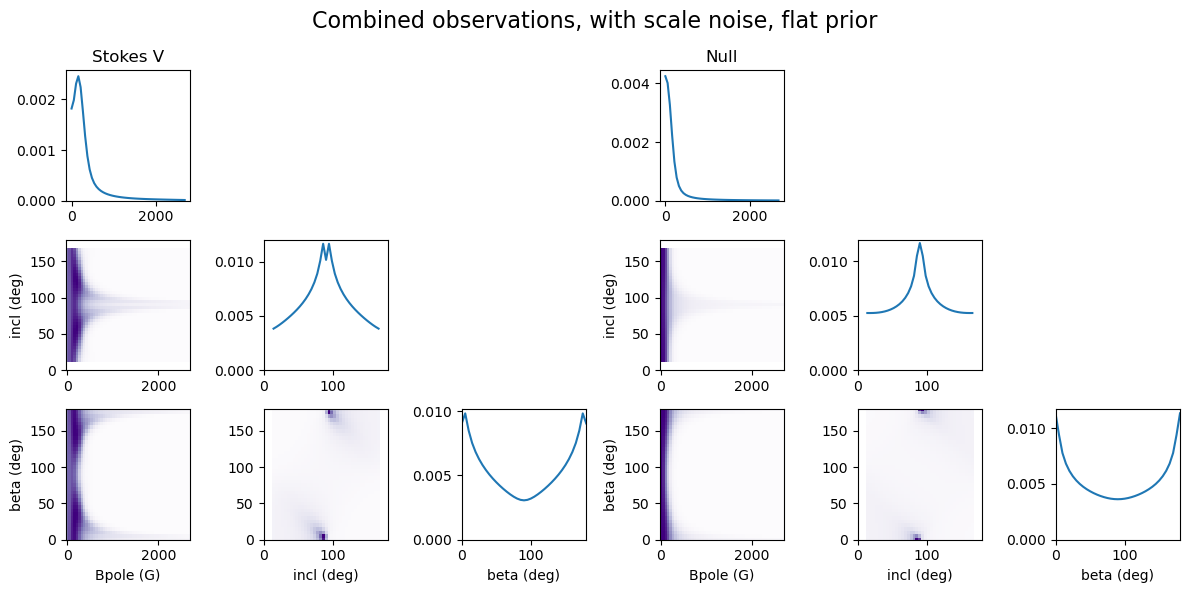

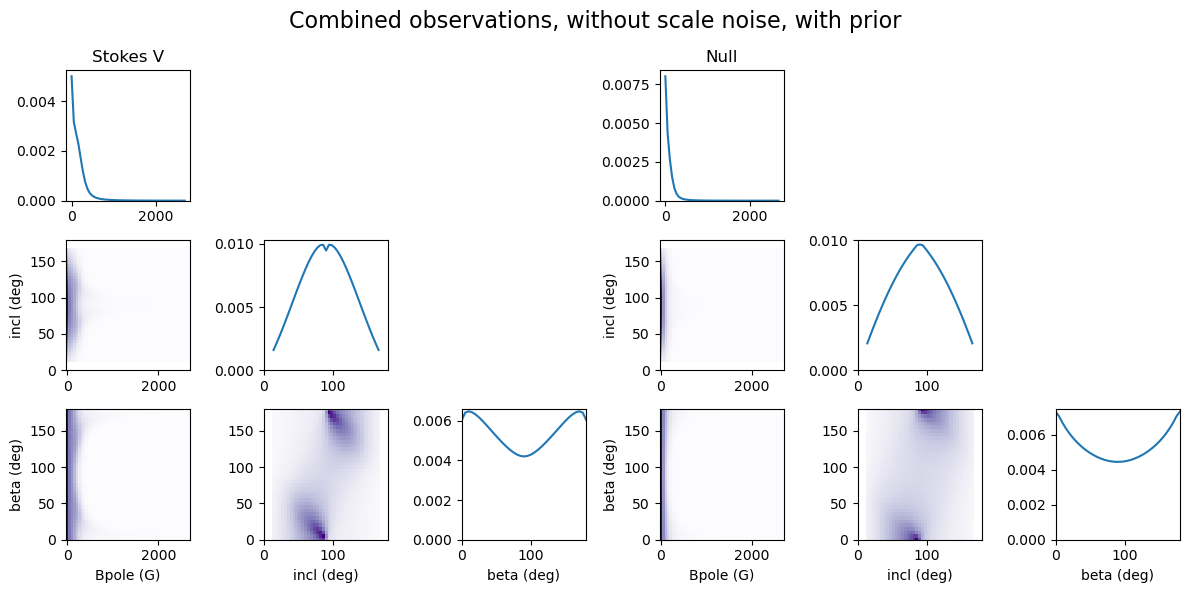

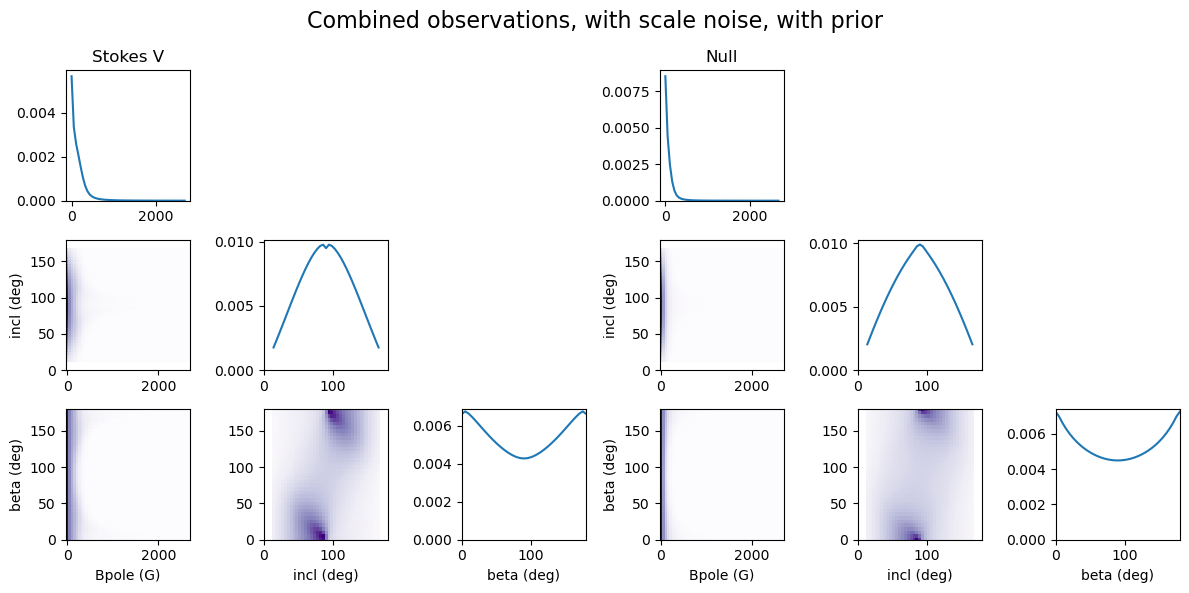

In [4]:
rav.BayesObjects.overview_plots(data, param, folder_path='ExampleOutput/04-CalculateProbabilities')

## Testing the mars1D new class